#### Importing libraries

In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime as dt
from streamlit_keplergl import keplergl_static
from PIL import Image
import plotly.io as pio

### Wrangle data

In [3]:
df = pd.read_csv('NY_CitiBike_data.csv', index_col = 0)

In [4]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
avgTemp               float64
bike_rides_daily        int64
_merge                 object
trip_duration         float64
value                   int64
dtype: object

In [5]:
# Reset the index to make the date a column
df.reset_index(inplace=True)

In [6]:
df.dtypes

date                   object
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
avgTemp               float64
bike_rides_daily        int64
_merge                 object
trip_duration         float64
value                   int64
dtype: object

In [7]:
# Create a month column
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['month'] = df['month'].astype('int')

In [8]:
df.dtypes

date                  datetime64[ns]
ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
avgTemp                      float64
bike_rides_daily               int64
_merge                        object
trip_duration                float64
value                          int64
month                          int64
dtype: object

In [9]:
# Create the season column

df['season'] = [
    "winter" if (month == 12 or month == 1 or month == 2)
    else "spring" if (month == 3 or month == 4 or month == 5)
    else "summer" if (month == 6 or month == 7 or month == 8)
    else "fall"
    for month in df['month']
]

In [10]:
df.shape

(30613517, 21)

In [12]:
df.columns

Index(['date', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge',
       'trip_duration', 'value', 'month', 'season'],
      dtype='object')

### Create the plotly charts

In [14]:
## Groupby

df['value'] = 1 
df_groupby_bar = df.groupby('start_station_name', as_index=False).agg({'value': 'sum'})
top20 = df_groupby_bar.nlargest(20, 'value')

In [15]:
# Save the top 20 stations as a CSV file
top20.to_csv('top20.csv', index=False)

In [16]:
# Aggregate temperature and bike rides to mean, grouped by date
df_agg = df.groupby(df['date'].dt.date).agg({
    'avgTemp': 'mean',
    'bike_rides_daily': 'mean'
}).reset_index()
df_agg['date'] = pd.to_datetime(df_agg['date'])

In [17]:
df_agg

date  avgTemp  bike_rides_daily
0   2022-01-01     11.6           20895.0
1   2022-01-02     11.4           44234.0
2   2022-01-03      1.4           34126.0
3   2022-01-04     -2.7           37879.0
4   2022-01-05      3.2           35080.0
..         ...      ...               ...
360 2022-12-27     -0.7           34395.0
361 2022-12-28      3.4           45677.0
362 2022-12-29      6.4           53677.0
363 2022-12-30      9.3           64550.0
364 2022-12-31      8.2           32895.0

[365 rows x 3 columns]

In [18]:
df_agg.to_csv('df_agg.csv', index=False)

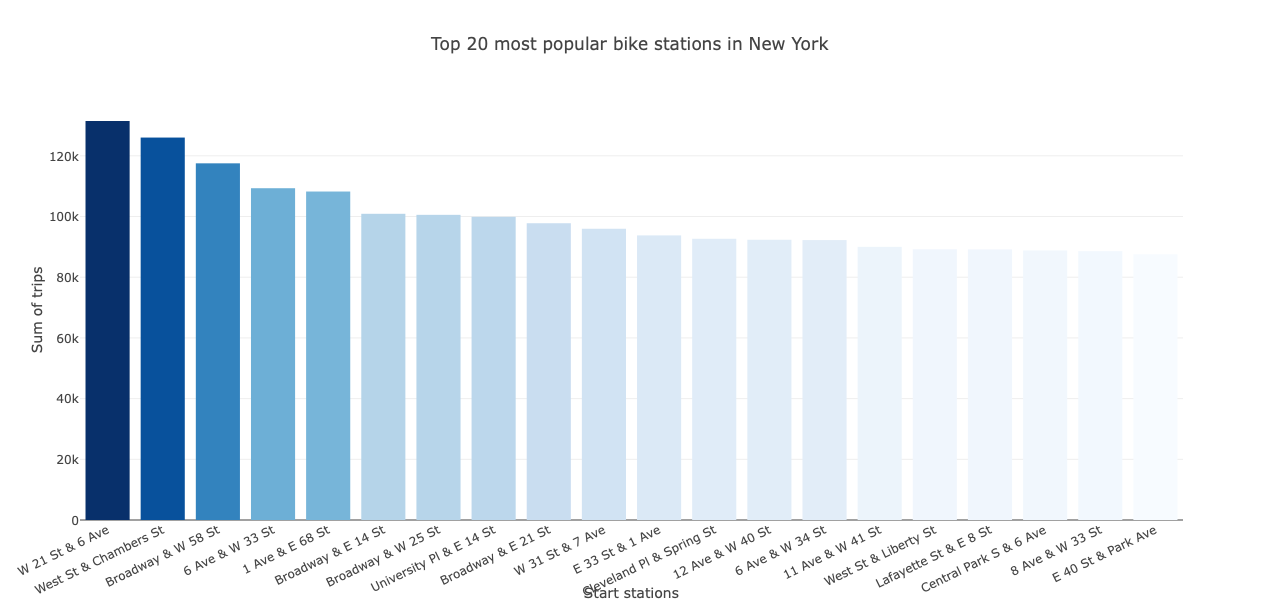

In [19]:
## Bar chart
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value'], marker={'color': top20['value'],'colorscale': 'Blues'}))
fig.update_layout(
    title = 'Top 20 most popular bike stations in New York',
    xaxis_title = 'Start stations',
    yaxis_title ='Sum of trips',
       xaxis_tickangle=-26,
    width = 900, height = 600,
)

In [20]:
pio.write_image(fig, 'top20_bar_chart.png')  # Save the figure as a PNG file

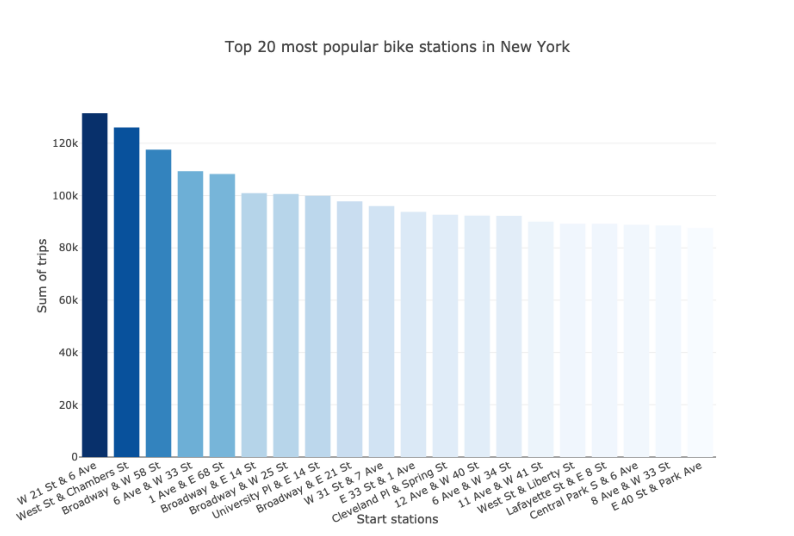

In [21]:
# Display the saved bar chart image using matplotlib
image_path_bar = 'top20_bar_chart.png'
top20_bar = Image.open(image_path_bar)
plt.figure(figsize=(10, 8))
plt.imshow(top20_bar)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

### Dual-Axis Line Charts in Plotly

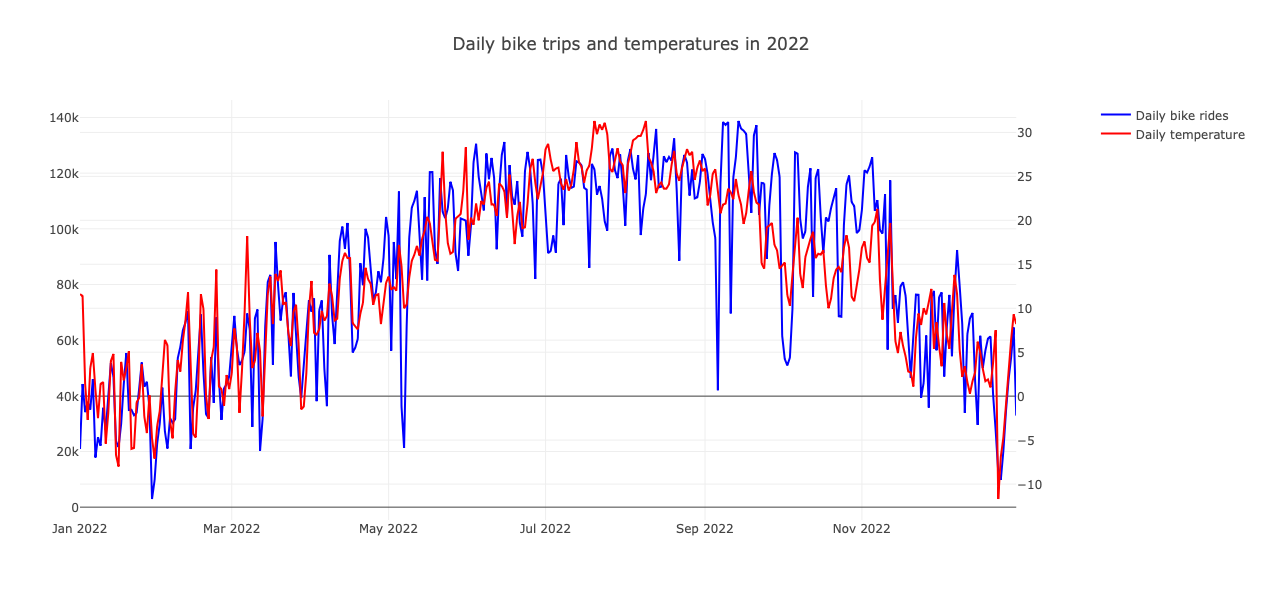

In [23]:
# Line chart
fig = make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df_agg['date'], y=df_agg['bike_rides_daily'], name='Daily bike rides', marker={'color': 'blue'}),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(x=df_agg['date'], y=df_agg['avgTemp'], name='Daily temperature', marker={'color': 'red'}),
    secondary_y=True
)
fig.update_layout(
title = 'Daily bike trips and temperatures in 2022',
height = 600
)

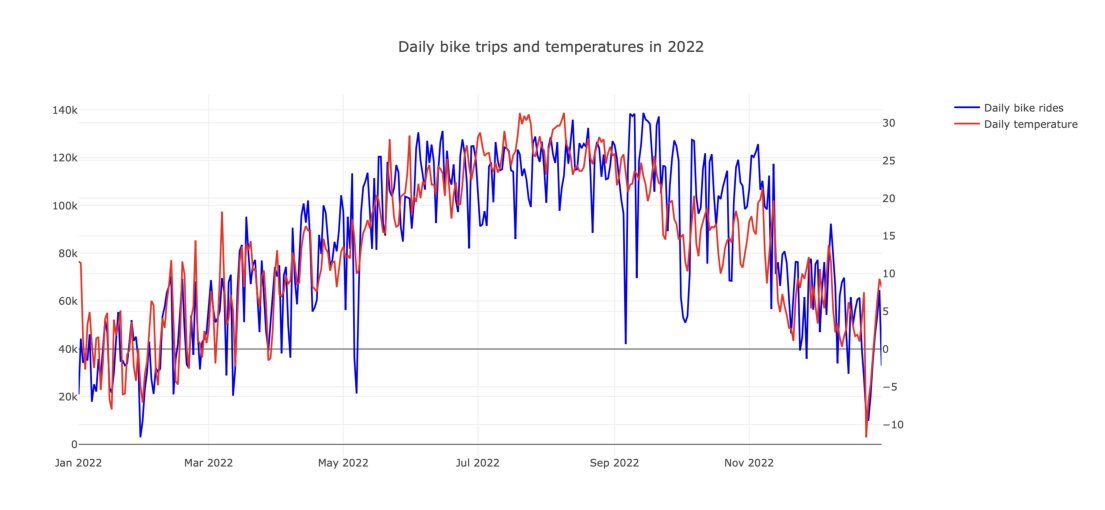

In [24]:
# Load the image
image_path = '/Users/prateeksharma/Downloads/bike trips 2022.png'  
image = Image.open(image_path)

# Display the image using matplotlib
plt.figure(figsize=(14, 8))
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
# Save the figure as a PNG file
plt.savefig('daily_bike_trips_temperatures.png', format='png', bbox_inches='tight')
plt.show()

In [25]:
df.columns

Index(['date', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge',
       'trip_duration', 'value', 'month', 'season'],
      dtype='object')

In [26]:
df_1 = df.loc[:, ['start_station_name', 'end_station_name', 'date', 'avgTemp', 'value', 'bike_rides_daily', 'season']]

In [27]:
df_1.columns

Index(['start_station_name', 'end_station_name', 'date', 'avgTemp', 'value',
       'bike_rides_daily', 'season'],
      dtype='object')

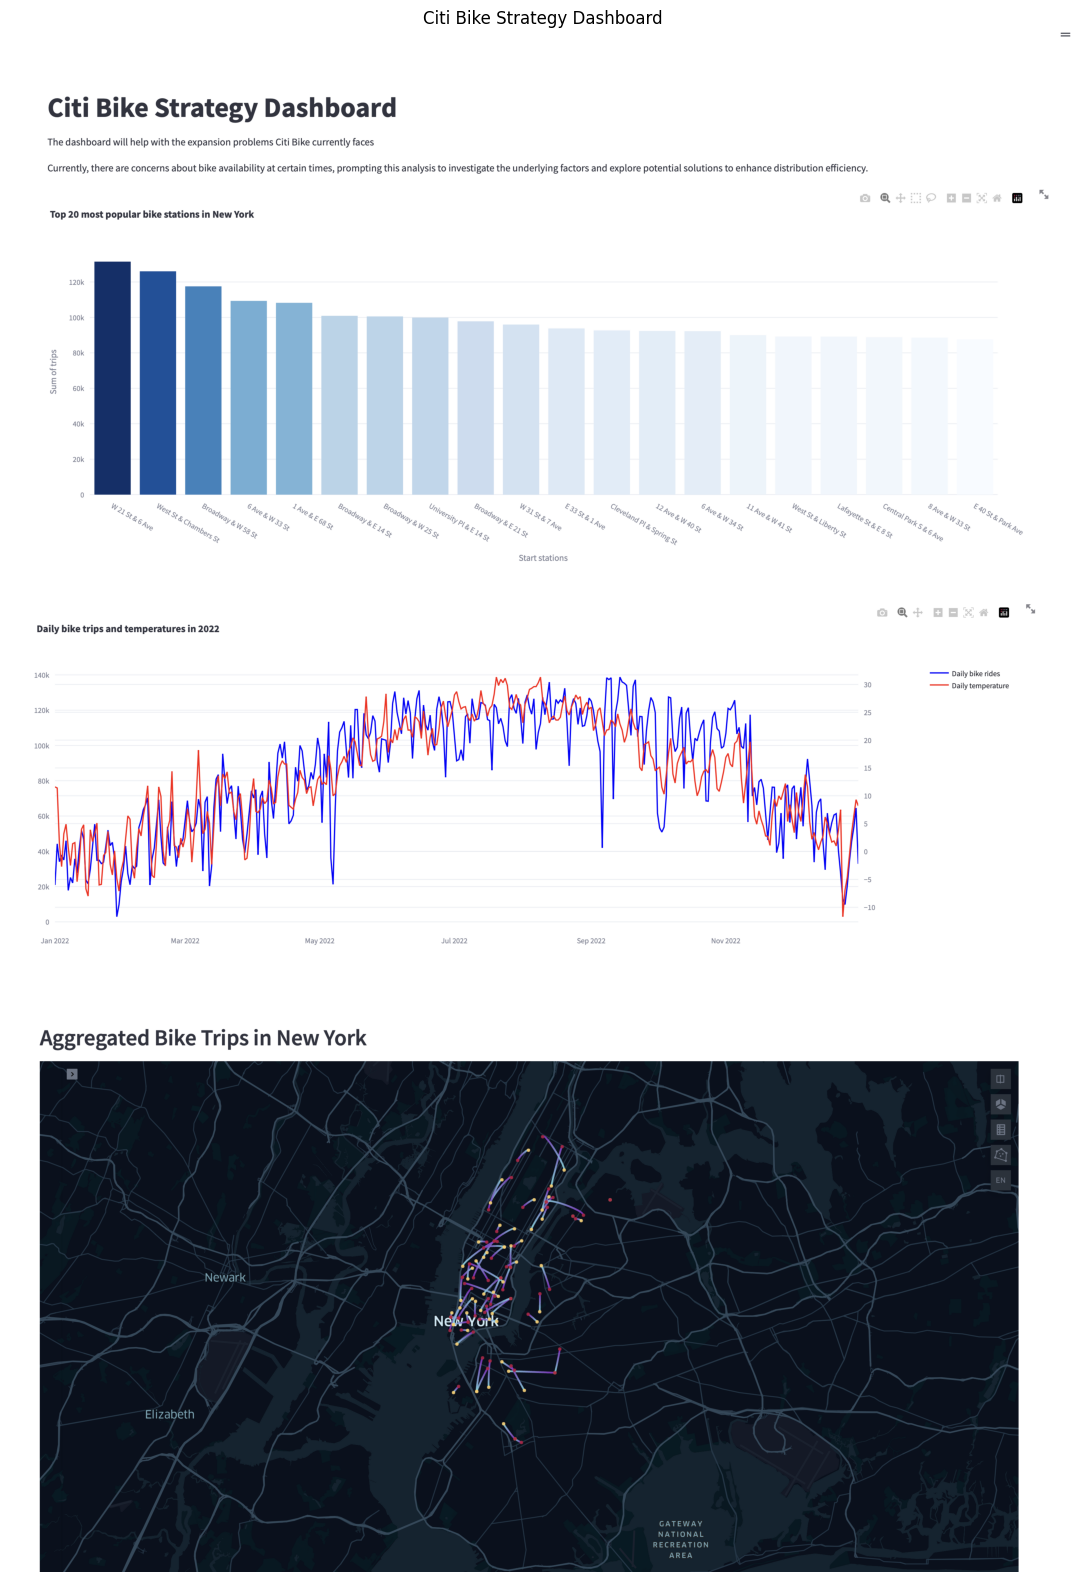

In [28]:
# Loading the Dashboard static image
image_path = '/Users/prateeksharma/Downloads/Dashboard.png'  
image = Image.open(image_path)

# Display the image using matplotlib
plt.figure(figsize=(30, 20))
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Citi Bike Strategy Dashboard')
# Save the figure as a PNG file
plt.savefig('Dashboard.png', format='png', bbox_inches='tight')
plt.show()

### Reduce the row and column count

In [53]:
# Create a copy with fewer columns
df_1 = df.drop(columns={'date', 'started_at', 'ended_at', 'ride_id', 'rideable_type',
                         'trip_duration', 'start_station_id', 'end_station_id', 'member_casual', 'month'})

### Create a random split

In [55]:
np.random.seed(32)
red = np.random.rand(len(df_1)) <= 0.995

In [56]:
small = df_1[~red]

In [57]:
small.shape

(151976, 11)

In [58]:
small.to_csv('reduced_data.csv',index = False)

In [59]:
df_1.to_csv('reduced_data_to_plot.csv', index=False)